In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

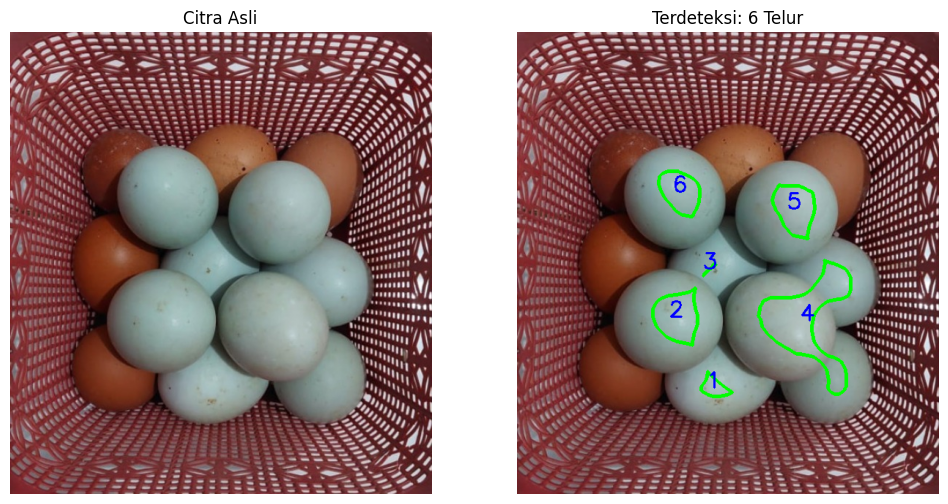

Jumlah telur yang terdeteksi: 6


NameError: name 'cite' is not defined

In [12]:
# 1. Akuisisi Citra
# Ganti 'telur.jpg' dengan nama file yang Anda upload ke Colab
img = cv2.imread('/content/drive/MyDrive/telur22.jpeg')
if img is None:
    print("Gambar tidak ditemukan. Pastikan sudah upload file!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2. Pre-processing (Filtering)
    # Menggunakan Gaussian Blur untuk menghaluskan tekstur telur dan wadah
    blur = cv2.GaussianBlur(gray, (15, 15), 0)

    # 3. Thresholding (Segmentasi) [cite: 51, 54]
    # Menggunakan Otsu untuk memisahkan telur (objek terang) dari background
    # Catatan: Karena telur biasanya lebih terang, kita pakai THRESH_BINARY
    ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 4. Operasi Morfologi [cite: 58, 61]
    # Membersihkan noise kecil di luar atau lubang di dalam telur
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # 5. Watershed Segmentation (Memisahkan Telur yang Menempel) [cite: 65, 66]
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    # Nilai 0.5 bisa disesuaikan (0.1 - 0.9) tergantung seberapa rapat telurnya
    ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)

    # 6. Menghitung Kontur dan Output [cite: 71, 75]
    sure_fg = np.uint8(sure_fg)
    cnts, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Menandai hasil pada gambar asli
    hasil = img.copy()
    for i, c in enumerate(cnts):
        cv2.drawContours(hasil, [c], -1, (0, 255, 0), 3)
        # Menulis nomor pada setiap telur
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(hasil, str(i+1), (cX-10, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Menampilkan Hasil
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(img_rgb), plt.title('Citra Asli')
    plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(hasil, cv2.COLOR_BGR2RGB)), plt.title(f'Terdeteksi: {len(cnts)} Telur')
    plt.axis('off')
    plt.show()

    print(f"Jumlah telur yang terdeteksi: {len(cnts)}") [cite: 76, 77]

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

Saving telurlagi.jpeg to telurlagi.jpeg


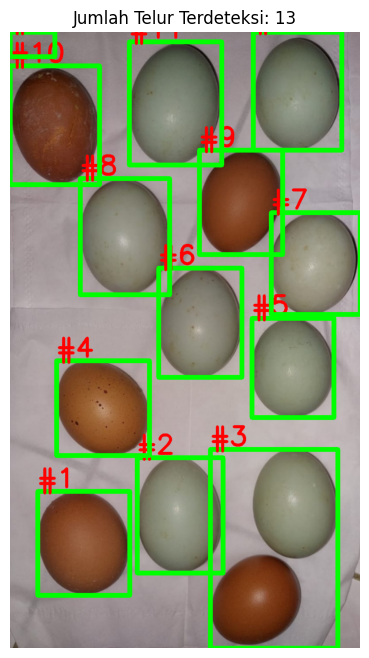

Total telur yang ditemukan: 13


In [8]:
# 1. Upload file gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 2. Baca gambar
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3. Preprocessing: Ubah ke grayscale dan beri sedikit blur untuk mengurangi noise
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# 4. Thresholding: Mengubah gambar menjadi hitam putih (biner)
# Kita gunakan Otsu's thresholding karena background relatif seragam
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 5. Morphological Operations: Menutup lubang kecil di dalam telur (jika ada)
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# 6. Deteksi Kontur
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 7. Filter kontur berdasarkan ukuran (untuk menghindari objek kecil/noise terhitung)
min_area = 500  # Sesuaikan jika telur terlalu kecil tidak terdeteksi
count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_area:
        count += 1
        # Menggambar kotak pembatas di sekitar telur yang terdeteksi
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 10)
        cv2.putText(img_rgb, f"#{count}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)

# 8. Tampilkan Hasil
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.title(f"Jumlah Telur Terdeteksi: {count}")
plt.axis('off')
plt.show()

print(f"Total telur yang ditemukan: {count}")